# Plant 300k Dataset - Exploratory Data Analysis

## 1. Imports and paths

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import json
import os
from pathlib import Path

if os.path.abspath(os.curdir)[-2:] != "ai":
    os.chdir("..")

DATA_DIR = Path(os.path.abspath(os.curdir) + "/data/plantnet_300K")

TEST_IMAGES_DIR = DATA_DIR / "images/test" 
TRAIN_IMAGES_DIR = DATA_DIR / "images/train" 
VAL_IMAGES_DIR = DATA_DIR / "images/val" 

There're two `.json` in the downloaded dataset: the 1st with images metadata (`plantnet300K_metadata.json`) and the 2nd linking species' id with its name (`plantnet300K_species_id_2_name.json`).

In [3]:
with DATA_DIR.joinpath("plantnet300K_metadata.json").open(encoding='utf-8') as f:
    metadata_d = json.load(f)
metadata_d

with DATA_DIR.joinpath("plantnet300K_species_id_2_name.json").open(encoding='utf-8') as f:
    species_name_d = json.load(f)
species_name_d

{'1355868': 'Lactuca virosa L.',
 '1355920': "Pelargonium capitatum (L.) L'Hér.",
 '1355932': "Pelargonium graveolens L'Hér.",
 '1355936': 'Cirsium arvense (L.) Scop.',
 '1355937': 'Cirsium vulgare (Savi) Ten.',
 '1355955': "Pelargonium odoratissimum (L.) L'Hér.",
 '1355959': "Pelargonium peltatum (L.) L'Hér.",
 '1355961': "Pelargonium quercifolium (L. f.) L'Hér.",
 '1355978': "Pelargonium zonale (L.) L'Hér.",
 '1355990': 'Mercurialis annua L.',
 '1356003': 'Phyllanthus tenellus Roxb.',
 '1356022': 'Hypericum perforatum L.',
 '1356037': 'Egeria densa Planch.',
 '1356055': 'Ibicella lutea (Lindl.) Van Eselt.',
 '1356075': 'Tradescantia fluminensis Vell.',
 '1356076': 'Tradescantia zebrina Heynh. ex Bosse',
 '1356111': 'Lamium amplexicaule L.',
 '1356126': 'Lavandula dentata L.',
 '1356138': 'Striga asiatica (L.) Kuntze',
 '1356257': 'Melilotus albus Medik.',
 '1356278': 'Trifolium fragiferum L.',
 '1356279': 'Asystasia gangetica (L.) T. Anderson',
 '1356309': 'Nymphaea nouchali Burm. f.

## 2. Features cleanup
I converted the `JSON` to a `DataFrame` to make further analysis more convenient.

In [4]:
df_species = pd.DataFrame(list(species_name_d.items()), columns=['species_id', 'species_name'])

print(f"Shape: {df_species.shape}")
df_species.head()

Shape: (1081, 2)


species_id                       species_name
0    1355868                  Lactuca virosa L.
1    1355920  Pelargonium capitatum (L.) L'Hér.
2    1355932      Pelargonium graveolens L'Hér.
3    1355936         Cirsium arvense (L.) Scop.
4    1355937        Cirsium vulgare (Savi) Ten.

In [5]:
df_images = pd.DataFrame.from_dict(metadata_d, orient='index')
df_images.index.name = 'image_id'
df_images = df_images.reset_index()

print(f"Shape: {df_images.shape}")
print(f"Features (columns): {[col for col in df_images.columns]}")

df_images.head()

Shape: (306146, 9)
Features (columns): ['image_id', 'species_id', 'obs_id', 'organ', 'is_shareable', 'v1_id', 'author', 'license', 'split']


image_id species_id      obs_id   organ  \
0  6033c318d5678da896eae5ae54ac60f71e5286bf    1391810  1008601284    leaf   
1  66d6455735fbdc582629dfc58940d9f409c7a9b3    1363021  1005119570  flower   
2  1a5c3ffe9142f29df7fb56fc519764a457e8d01d    1398567  1004431075    leaf   
3  e86c71b84e97af16307801a1b986269fb4243fc1    1362954  1008006449    leaf   
4  8f954427dfbf8853bf8d655fa9bdda2801ebc025    1359498  1006017920  flower   

   is_shareable v1_id                author   license split  
0          True         Heribert Zimmermann  cc-by-sa   val  
1          True             Jimenez Melissa  cc-by-sa   val  
2          True                        Lisa  cc-by-sa   val  
3          True        Pasqualotto Rossella  cc-by-sa   val  
4          True               Elizabeth Roy  cc-by-sa  test

According to the plantnet_300K documentation, each column is:
* `image_id`: unique id (and filename) for image in the dataset
* `species_id`: id linking the image to a specific plant species (also: dir name)
* `obs_id`: observation id; grouping multiple images from the same plant observation event
* `organ`: plant part captured in the img (leaf, flower, ...)
* `is_sharable`: True/False value depending whether the image can be publicly shared
* `v1_id`: id for the previous version (`v1`) of the PlantNet
* `author`: author
* `license`: license
* `split`: whether belongs to the training/testing/validation dataset

In [6]:
df_combined = df_images.merge(df_species, on='species_id', how='left')

missing_names = df_combined[df_combined['species_name'].isna()]
print(f"\nWithout species name: {len(missing_names):,} ({len(missing_names)/len(df_combined)*100:.2f}%)")

df_combined.head()


Without species name: 0 (0.00%)


image_id species_id      obs_id   organ  \
0  6033c318d5678da896eae5ae54ac60f71e5286bf    1391810  1008601284    leaf   
1  66d6455735fbdc582629dfc58940d9f409c7a9b3    1363021  1005119570  flower   
2  1a5c3ffe9142f29df7fb56fc519764a457e8d01d    1398567  1004431075    leaf   
3  e86c71b84e97af16307801a1b986269fb4243fc1    1362954  1008006449    leaf   
4  8f954427dfbf8853bf8d655fa9bdda2801ebc025    1359498  1006017920  flower   

   is_shareable v1_id                author   license split  \
0          True         Heribert Zimmermann  cc-by-sa   val   
1          True             Jimenez Melissa  cc-by-sa   val   
2          True                        Lisa  cc-by-sa   val   
3          True        Pasqualotto Rossella  cc-by-sa   val   
4          True               Elizabeth Roy  cc-by-sa  test   

                                        species_name  
0  Dryopteris expansa (C.Presl) Fraser-Jenk. & Jermy  
1                Cenchrus setaceus (Forssk.) Morrone  
2                             Smilax rotundifolia L.  
3              Schefflera actinophylla (Endl.) Harms  
4                            Trifolium incarnatum L.

## 3. Statistics
Number of unique features, number of images (in total) and avg amounts of images per (species).

In [7]:
species_counts = df_combined['species_name'].value_counts()

print(f"Unique species: {len(species_counts):,}")
print(f"Min images per species: {species_counts.min()}")
print(f"Max images per species: {species_counts.max()}")
print(f"Avg image per species: {species_counts.mean():.2f}")
print(f"Median image per species: {species_counts.median():.0f}")

species_counts.describe()

Unique species: 1,081
Min images per species: 4
Max images per species: 9012
Avg image per species: 283.21
Median image per species: 27


count    1081.00000
mean      283.20629
std       846.94568
min         4.00000
25%         9.00000
50%        27.00000
75%       142.00000
max      9012.00000
Name: count, dtype: float64

Let's see which species has the greatest amount of images in its category.


Top 10 SPECIES:
   1. Daucus carota L.: 9,012 (2.94%)
   2. Alliaria petiolata (M.Bieb.) Cavara & Grande: 7,922 (2.59%)
   3. Hypericum perforatum L.: 7,675 (2.51%)
   4. Centranthus ruber (L.) DC.: 6,670 (2.18%)
   5. Cirsium vulgare (Savi) Ten.: 6,474 (2.11%)
   6. Trifolium pratense L.: 6,330 (2.07%)
   7. Calendula officinalis L.: 6,047 (1.98%)
   8. Lamium purpureum L.: 5,628 (1.84%)
   9. Alcea rosea L.: 5,357 (1.75%)
  10. Papaver rhoeas L.: 5,009 (1.64%)


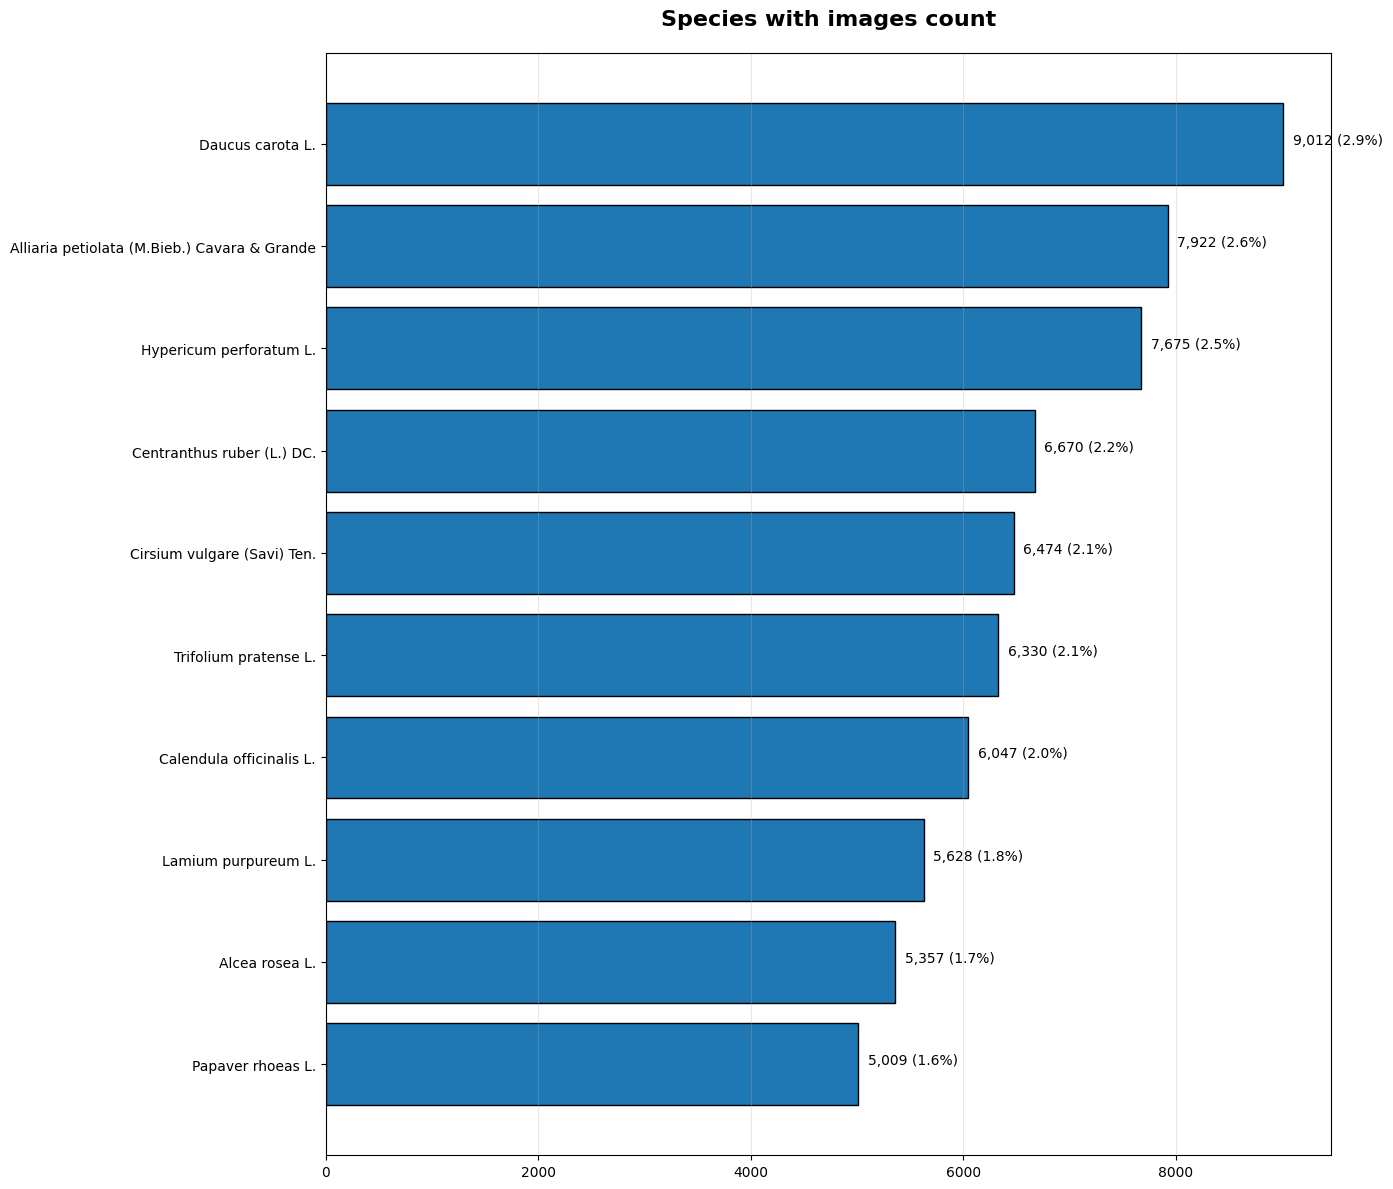

In [8]:
species_image_counts = df_combined.groupby(['species_id', 'species_name']).size().sort_values(ascending=False)
top_10_species = species_image_counts.head(10)

print("\nTop 10 SPECIES:")
for i, ((species_id, species_name), count) in enumerate(top_10_species.items(), 1):
    percentage = (count / len(df_images)) * 100
    print(f"  {i:2d}. {species_name[:50]}: {count:,} ({percentage:.2f}%)")

fig, ax = plt.subplots(figsize=(14, 12))

y_pos = np.arange(len(top_10_species))
species_names = [name[:45] + '...' if len(name) > 45 else name 
                 for _, name in top_10_species.index]

bars = ax.barh(y_pos, top_10_species.values, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(species_names)
ax.invert_yaxis()
ax.set_title('Species with images count', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, top_10_species.values)):
    percentage = (count / len(df_images)) * 100
    ax.text(count + max(top_10_species.values)*0.01, i, f'{count:,} ({percentage:.1f}%)')

plt.tight_layout()
plt.show()

## 4. Data Visualisation

First, we'll look at the organs' distribution. As one may notice, 'flower' parts appeared the most frequently.

flower: 176,531 (57.66%)
leaf: 110,784 (36.19%)
fruit: 11,277 (3.68%)
habit: 4,445 (1.45%)
bark: 2,076 (0.68%)
other: 993 (0.32%)
branch: 37 (0.01%)
scan: 2 (0.00%)
none: 1 (0.00%)


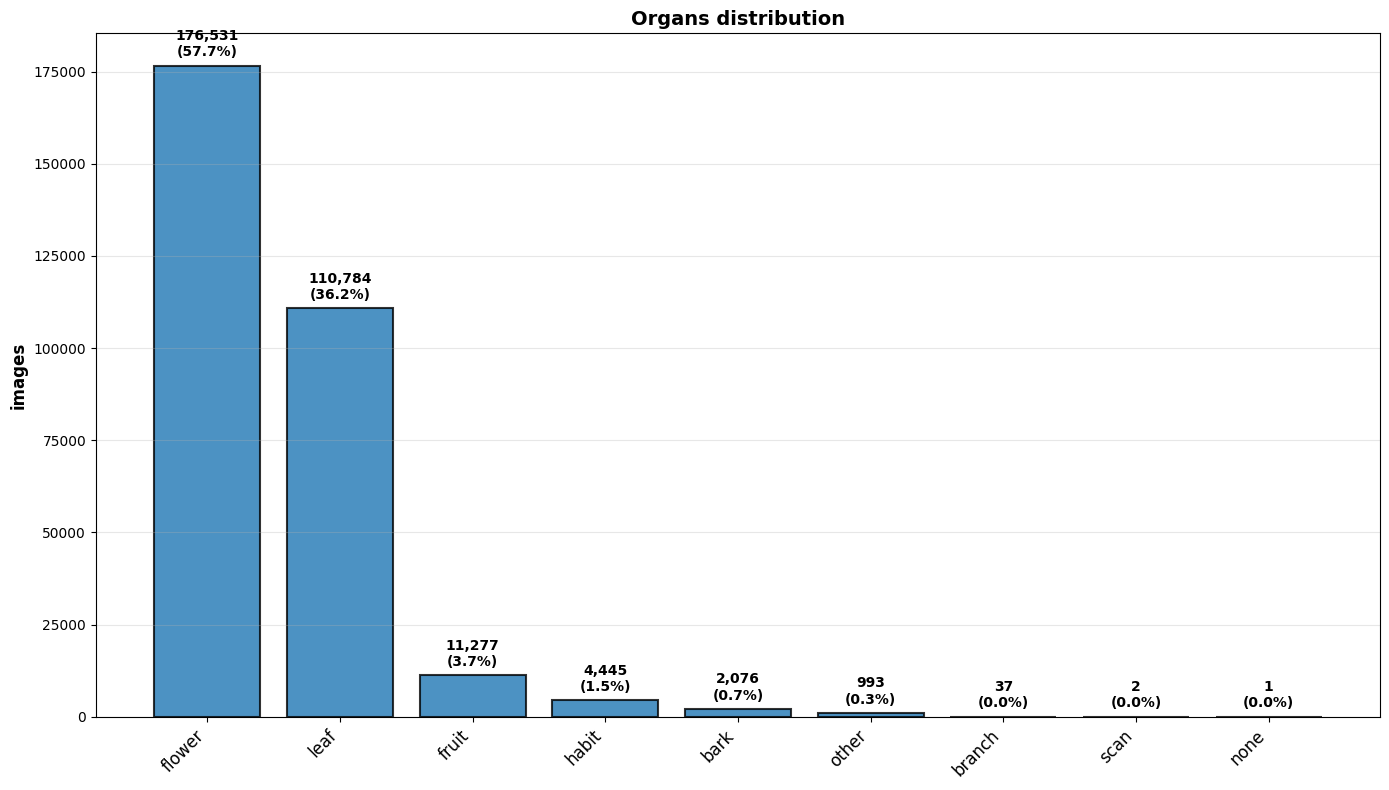

In [9]:
organ_counts = df_images['organ'].value_counts().sort_values(ascending=False)

for organ, count in organ_counts.items():
    percentage = (count / len(df_images)) * 100
    print(f"{organ}: {count:,} ({percentage:.2f}%)")

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

bars = ax.bar(range(len(organ_counts)), organ_counts.values, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xticks(range(len(organ_counts)))
ax.set_xticklabels(organ_counts.index, rotation=45, ha='right', fontsize=12)
ax.set_ylabel('images', fontsize=12, fontweight='bold')
ax.set_title('Organs distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for i, (bar, count) in enumerate(zip(bars, organ_counts.values)):
    percentage = (count / len(df_images)) * 100
    ax.text(i, count + max(organ_counts.values)*0.01, f'{count:,}\n({percentage:.1f}%)', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
species_counts = df_combined['species_name'].value_counts()
species_counts.describe()

count    1081.00000
mean      283.20629
std       846.94568
min         4.00000
25%         9.00000
50%        27.00000
75%       142.00000
max      9012.00000
Name: count, dtype: float64

Unbalanced counts. Therefore, `log scale` in presenting distribution should be used.

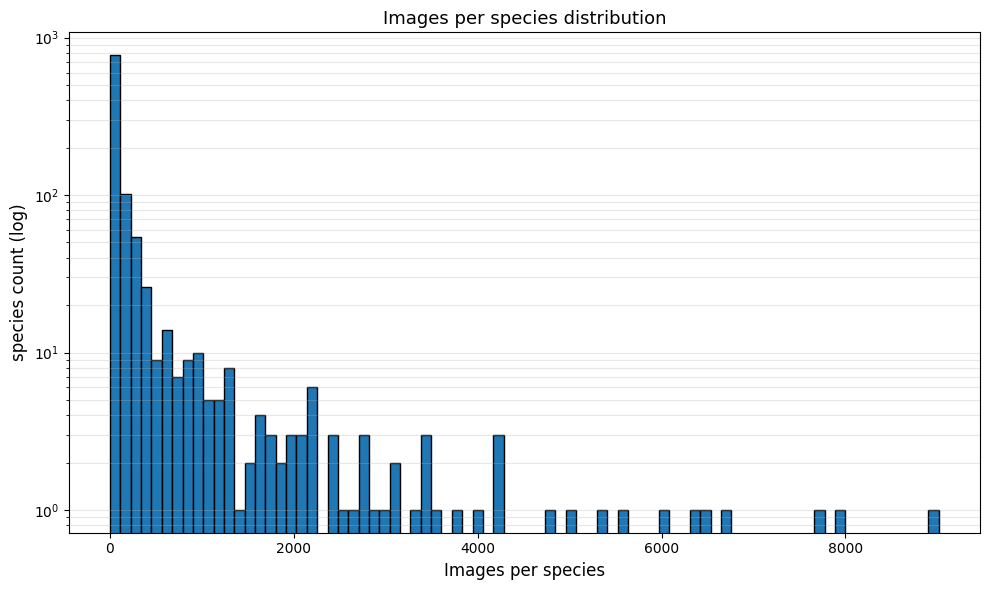

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(species_counts.values, bins=80, edgecolor='black')
ax.set_xlabel('Images per species', fontsize=12)
ax.set_ylabel('species count (log)', fontsize=12)
ax.set_yscale('log')
ax.set_title('Images per species distribution', fontsize=13)
ax.grid(axis='y', alpha=0.3, which='both')

plt.tight_layout()
plt.show()

Now, we will look closer how the `organ`s are distributed among the most common species (in the top 10).


Distribution for top 10 species:
organ                         bark  branch  flower  fruit  habit  leaf  other
Daucus carota L.                65       0    6947    192     91  1689     28
Alliaria petiolata (M.Bie...    16       0    4134     28     97  3637     10
Hypericum perforatum L.         25       2    6278     48    113  1182     27
Centranthus ruber (L.) DC...    19       0    5592      9    107   925     18
Cirsium vulgare (Savi) Te...    47       0    3527     94    112  2673     21
Trifolium pratense L.           16       0    5415     18     40   832      9
Calendula officinalis L.         4       0    5181     28     45   776     13
Lamium purpureum L.             21       0    3898      9     36  1643     21
Alcea rosea L.                  17       1    3698     54     73  1499     15
Papaver rhoeas L.               22       0    4202     90     51   628     16


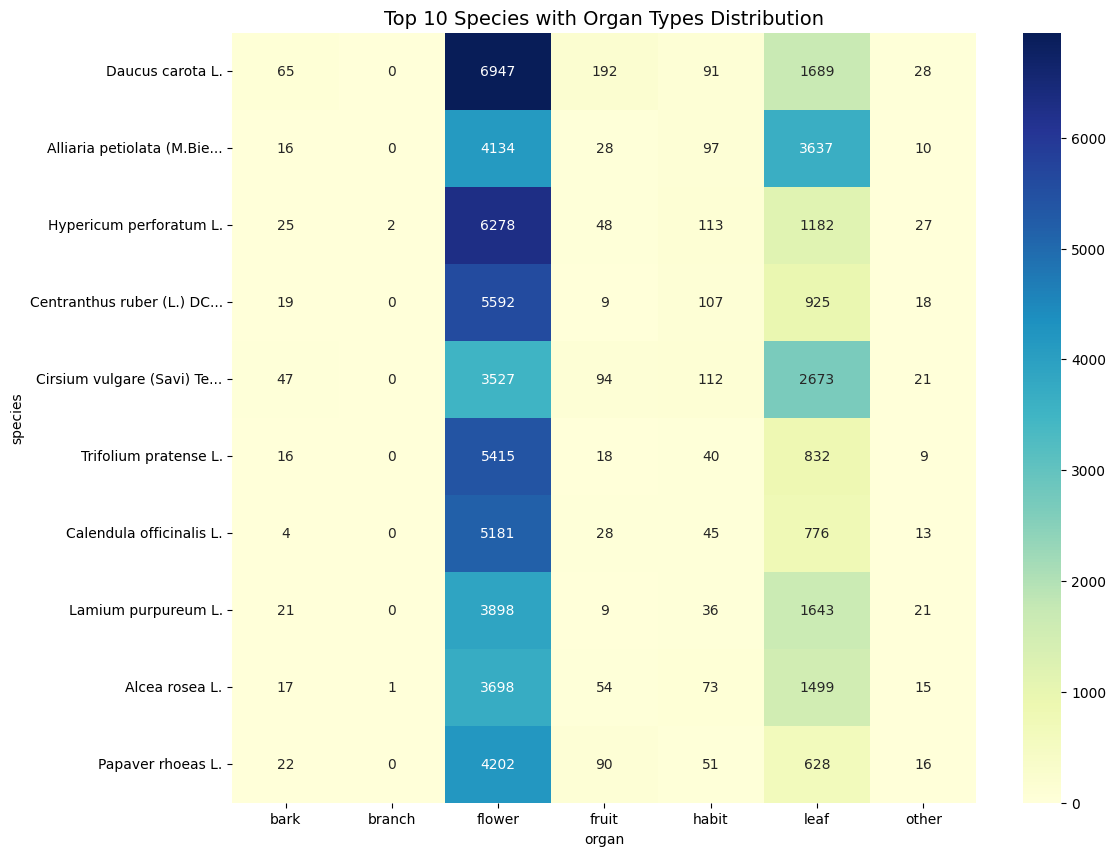

In [12]:
top_species = df_combined['species_id'].value_counts().head(10).index
df_top = df_combined[df_combined['species_id'].isin(top_species)]

# table combining species with organs
pivot_table = df_top.pivot_table(
    index='species_name',
    columns='organ',
    aggfunc='size',  # how manyt rows
    fill_value=0
)

pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]
pivot_table.index = [name[:25] + '...' if len(name) > 25 else name for name in pivot_table.index]

print(f"\nDistribution for top 10 species:")
print(pivot_table)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Species with Organ Types Distribution', fontsize=14)

plt.xlabel('organ')
plt.ylabel('species')

plt.show()

As we can see, flowers are the most documented organs. Is this because flowers are the largest part of the plant?

## 5. Images Analysis

In this part, we will look at how image data is presented - what's the size, how the average image looks like etc.

In [13]:
def load_image_safe(image_id, data_split='train'):
    img_dir = TRAIN_IMAGES_DIR if data_split == 'train' else (TEST_IMAGES_DIR if data_split == 'test' else VAL_IMAGES_DIR)
    img_path = img_dir / f"{image_id['species_id']}" / f"{image_id['image_id']}.jpg"
    
    if img_path.exists():
        try:
            return Image.open(img_path).convert('RGB')
        except Exception as e:
            return None
    return None

Shape: (600, 600, 3)
Mode: RGB
Size: (600, 600)
Species: Papaver rhoeas L.
Organ: flower


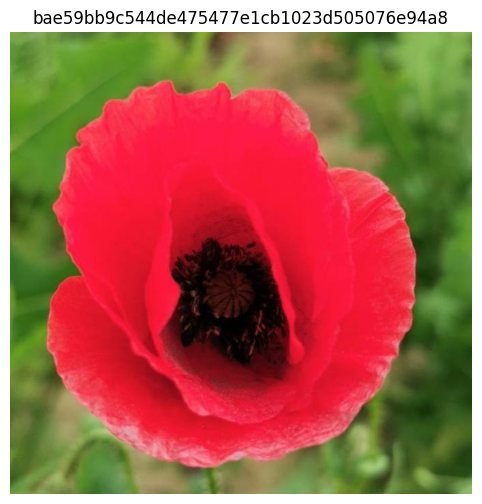

In [14]:
sample = df_combined.sample(n=1).iloc[0]
img_data = {'species_id': sample['species_id'], 'image_id': sample['image_id']}

img = None
for split in ['train', 'val', 'test']:
    img = load_image_safe(img_data, split)
    if img: break

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')

print(f"Shape: {np.array(img).shape}")
print(f"Mode: {img.mode}")
print(f"Size: {img.size}")
print(f"Species: {sample['species_name']}")
if 'organ' in sample:
    print(f"Organ: {sample['organ']}")

plt.title(f"{sample['image_id']}", fontsize=12)
plt.show()

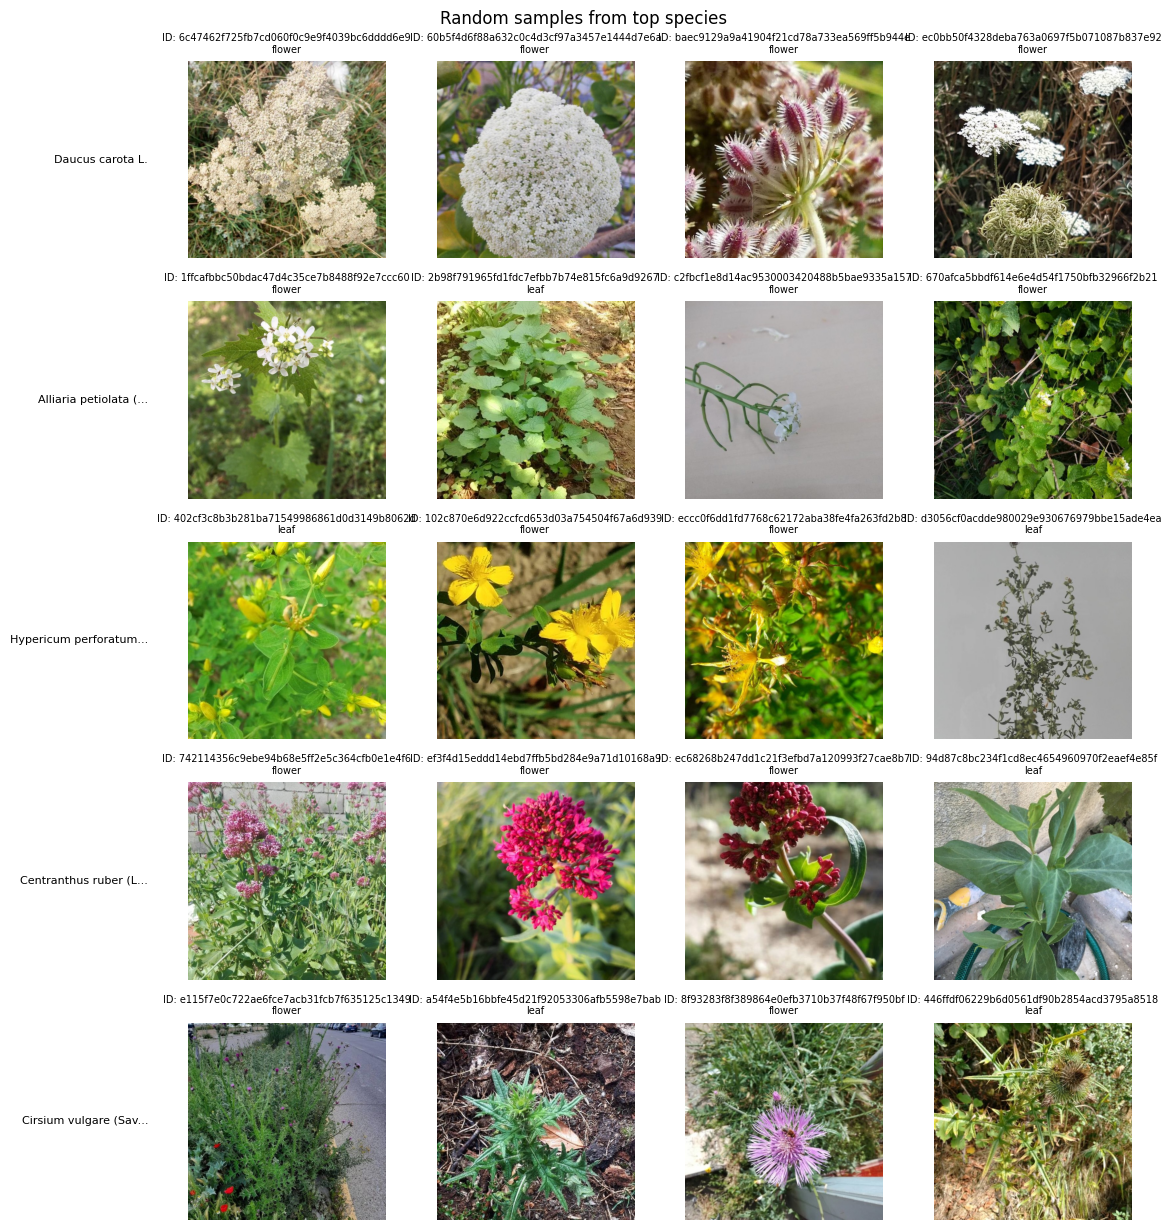

In [15]:
def show_random(n, n_species):
    fig, axes = plt.subplots(n_species, n, figsize=(n * 3, n_species*2.5))
    
    for row, species_id in enumerate(top_species[:n_species]):
        name = df_combined[df_combined['species_id'] == species_id]['species_name'].iloc[0]
        species_imgs = df_images[df_images['species_id'] == species_id]
        
        for col in range(n):
            ax = axes[row, col] if n_species > 1 else axes[col]
            
            if len(species_imgs) > 0:
                sample = species_imgs.sample(n=1).iloc[0]
                img_data = {'species_id': sample['species_id'], 'image_id': sample['image_id']}
                
                img = None
                for split in ['train', 'val', 'test']:
                    img = load_image_safe(img_data, split)
                    if img:
                        break
                
                if img:
                    ax.imshow(img)
                    title = f"ID: {sample['image_id']}"
                    if 'organ' in sample:
                        title += f"\n{sample['organ']}"
                    ax.set_title(title, fontsize=7)
                else:
                    ax.text(0.5, 0.5, 'No file', ha='center', va='center', fontsize=8)
            else:
                ax.text(0.5, 0.5, 'No images', ha='center', va='center', fontsize=8)
            
            ax.axis('off')
            
            if col == 0:
                label = name[:20] + "..." if len(name) > 20 else name
                ax.text(-0.2, 0.5, label, transform=ax.transAxes, fontsize=8, 
                       va='center', ha='right')
    
    plt.suptitle('Random samples from top species', fontsize=12, y=0.98)
    plt.tight_layout()
    plt.show()

show_random(n=4, n_species=5)

Next, we will analyse what each species group looks like on average. We will do this by averaging the pixels. It's also worth mentioning that the images do not have a fixed size, so they need to be resized (normalization).

In [16]:
def avg_image(species_id, size=(256, 256), n_images=100):
    species_imgs = df_images[df_images['species_id'] == species_id]
    images = []
    
    for _, row in species_imgs.head(n_images).iterrows():
        img_data = {'species_id': row['species_id'], 'image_id': row['image_id']}
        
        for split in ['train', 'val', 'test']:
            img = load_image_safe(img_data, split)
            if img:
                images.append(np.array(img.resize(size), dtype=np.float32))
                break
    
    if len(images) == 0:
        return None, 0
    
    avg = np.mean(images, axis=0).astype(np.uint8)
    return Image.fromarray(avg), len(images)

1. Daucus carota L.: 9,012 images
2. Alliaria petiolata (M.Bieb.) Cavara & Grande: 7,922 images
3. Hypericum perforatum L.: 7,675 images
4. Centranthus ruber (L.) DC.: 6,670 images
5. Cirsium vulgare (Savi) Ten.: 6,474 images
6. Trifolium pratense L.: 6,330 images


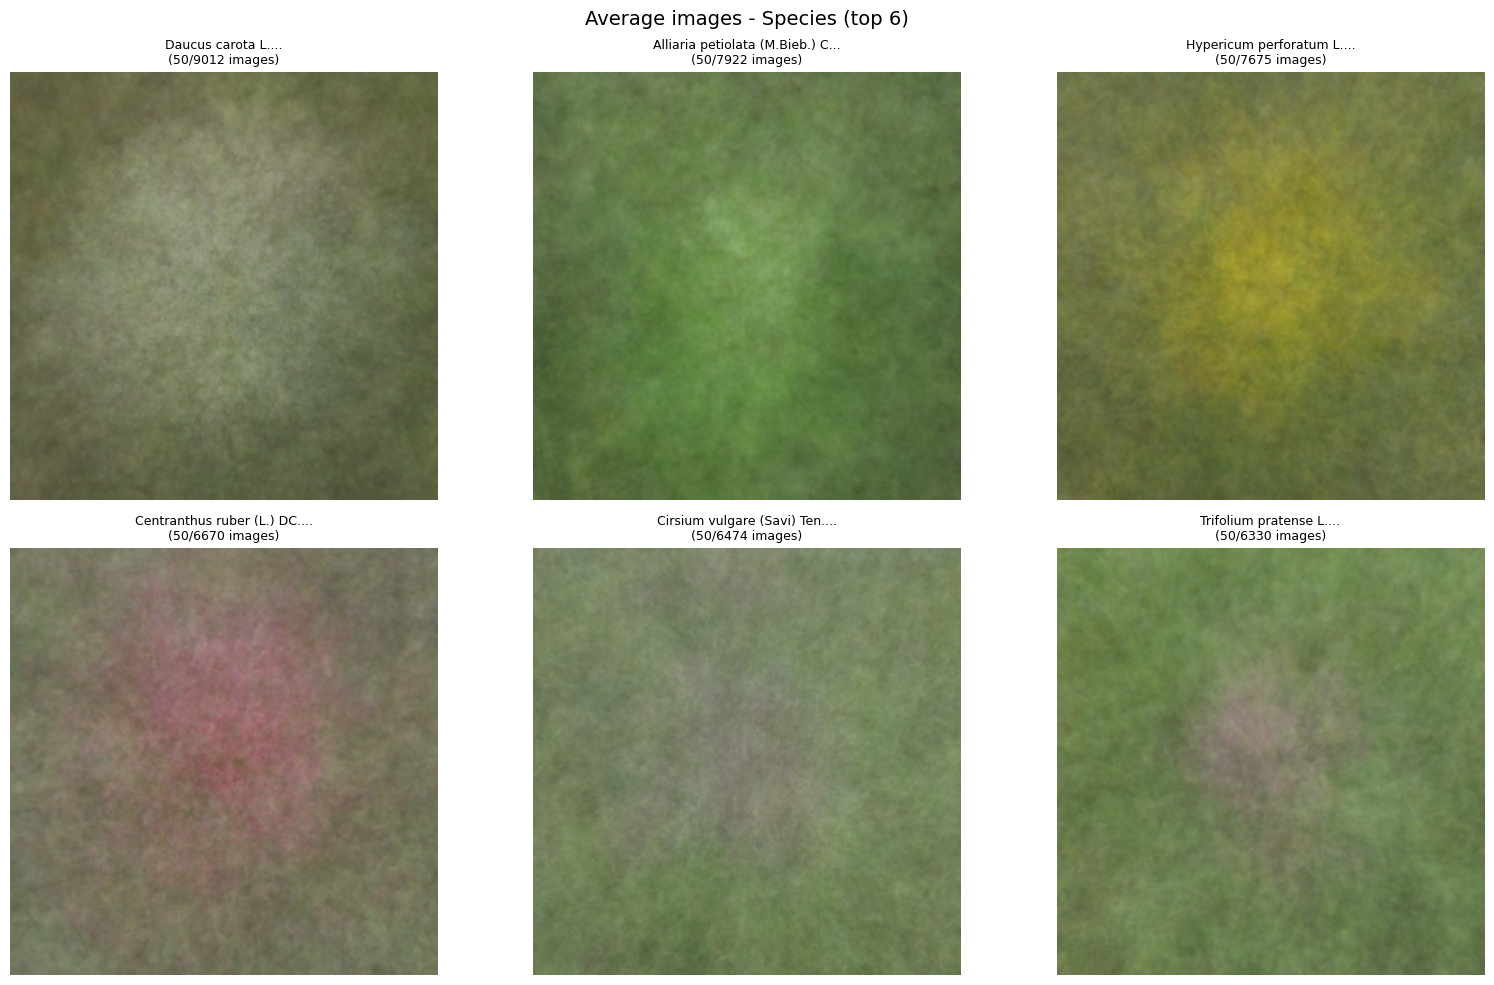

In [17]:
top_species = df_combined['species_id'].value_counts().head(6).index

for i, species_id in enumerate(top_species, 1):
    name = df_combined[df_combined['species_id'] == species_id]['species_name'].iloc[0]
    count = df_combined[df_combined['species_id'] == species_id].shape[0]
    print(f"{i}. {name}: {count:,} images")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, species_id in enumerate(top_species):
    if idx >= 6:
        break
    
    name = df_combined[df_combined['species_id'] == species_id]['species_name'].iloc[0]
    count = df_combined[df_combined['species_id'] == species_id].shape[0]
    
    avg_img, n_used = avg_image(species_id, n_images=50)
    
    ax = axes[idx]
    if avg_img:
        ax.imshow(avg_img)
        title = f"{name[:30]}...\n({n_used}/{count} images)"
        ax.set_title(title, fontsize=9)
    else:
        ax.set_title(name[:30], fontsize=9)
    
    ax.axis('off')

plt.suptitle('Average images - Species (top 6)', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

Top species: Daucus carota L.


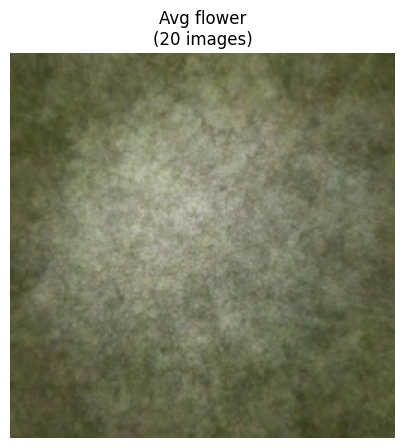

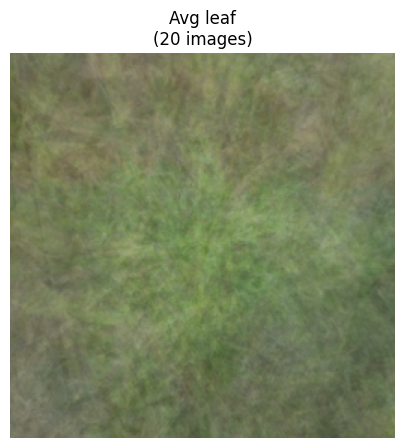

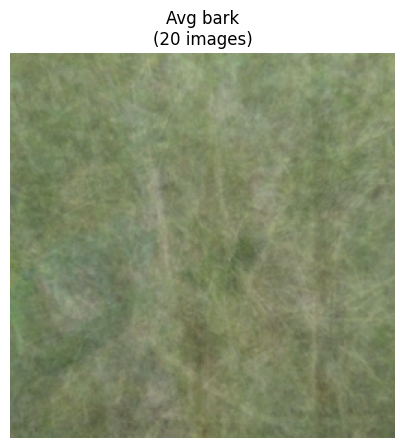

In [18]:
def avg_organ(species_id, organ, size=(256, 256), n=50):
    """Average image for organ"""
    organ_imgs = df_images[(df_images['species_id'] == species_id) & (df_images['organ'] == organ)]
    images = []
    
    for _, row in organ_imgs.head(n).iterrows():
        img_data = {'species_id': row['species_id'], 'image_id': row['image_id']}
        
        for split in ['train', 'val', 'test']:
            img = load_image_safe(img_data, split)
            if img:
                images.append(np.array(img.resize(size), dtype=np.float32))
                break
    
    if len(images) == 0:
        return None, 0
    
    avg = np.mean(images, axis=0).astype(np.uint8)
    return Image.fromarray(avg), len(images)

top_id = df_combined['species_id'].value_counts().index[0]
name = df_combined[df_combined['species_id'] == top_id]['species_name'].iloc[0]

print(f"Top species: {name}")

if 'organ' in df_images.columns:
    organs = df_images[df_images['species_id'] == top_id]['organ'].unique()
    
    for organ in organs[:3]:
        avg_img, n = avg_organ(top_id, organ, n=20)
        
        if avg_img:
            plt.figure(figsize=(6, 5))
            plt.imshow(avg_img)
            plt.title(f"Avg {organ}\n({n} images)")
            plt.axis('off')
            plt.show()